# Flowtraders Assignment

Mark de Kwaasteniet (2649271)\
Daniel van Hanswijk (2726843)

### Add imports 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

### Question 1
- _Read the data in the midpoint model training file_
- _Check if the data is well ordered_

In [2]:
df = pd.read_csv('Bond_MidModelTraining.csv')

_Change the epoch to date_\
This makes it more clear to see if the data is indeed well ordered

In [3]:
df.rename(columns={'epochhours': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'], unit='s')
df.head(5)


,date,last_price,firm_executable_bid,firm_executable_ask,market_estimate_bid,market_estimate_ask
0,2020-10-19 06:00:00,NaN,NaN,NaN,122.314000,122.941544
1,2020-10-19 06:00:00,NaN,122.335739,122.960435,NaN,NaN
2,2020-10-19 07:00:00,NaN,122.374000,122.994429,NaN,NaN
3,2020-10-19 07:00:00,NaN,NaN,NaN,122.288552,122.912063
4,2020-10-19 08:00:00,NaN,NaN,NaN,122.386577,123.009203


### Question 2
_Create mid dealer quotes and mid market estimatesas_ $\frac{ask + bid}{2}$

In [4]:
df['mid_dealer_quotes'] = (df['firm_executable_bid'] + df['firm_executable_ask']) / 2
df['mid_market_estimate'] = (df['market_estimate_bid'] + df['market_estimate_ask']) / 2
df.head(5)

,date,last_price,firm_executable_bid,firm_executable_ask,market_estimate_bid,market_estimate_ask,mid_dealer_quotes,mid_market_estimate
0,2020-10-19 06:00:00,NaN,NaN,NaN,122.314000,122.941544,NaN,122.627772
1,2020-10-19 06:00:00,NaN,122.335739,122.960435,NaN,NaN,122.648087,NaN
2,2020-10-19 07:00:00,NaN,122.374000,122.994429,NaN,NaN,122.684214,NaN
3,2020-10-19 07:00:00,NaN,NaN,NaN,122.288552,122.912063,NaN,122.600308
4,2020-10-19 08:00:00,NaN,NaN,NaN,122.386577,123.009203,NaN,122.697890


### Question 3
_Forward fill the NA's_

In [5]:
cols = ['mid_dealer_quotes', 'mid_market_estimate']
df[cols] = df[cols].fillna(method='ffill')


_Filter on Last Price_\
remove all rows where there is no last price

In [6]:
df = df[df['last_price'].notna()]
df.head(5)

,date,last_price,firm_executable_bid,firm_executable_ask,market_estimate_bid,market_estimate_ask,mid_dealer_quotes,mid_market_estimate
61,2020-10-21 14:00:00,122.6405,NaN,NaN,NaN,NaN,122.625921,122.489040
84,2020-10-22 14:00:00,122.7670,NaN,NaN,NaN,NaN,122.659321,122.491805
105,2020-10-23 14:00:00,122.8050,NaN,NaN,NaN,NaN,122.652038,122.447501
142,2020-10-27 09:00:00,122.9860,NaN,NaN,NaN,NaN,122.900167,122.801587
186,2020-10-29 09:00:00,123.0670,NaN,NaN,NaN,NaN,123.139389,123.070121


### Question 4
_Plot the data_

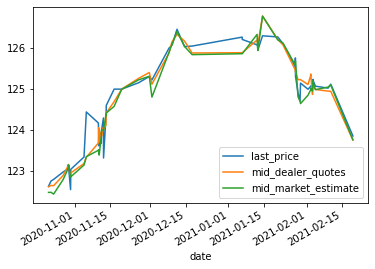

In [7]:
df.plot.line(x='date', y=['last_price', 'mid_dealer_quotes', 'mid_market_estimate'])

### Question 5
_Transform data into returns_

In [8]:
returns = pd.DataFrame()
returns['date'] = df['date']

cols = ['last_price', 'mid_dealer_quotes', 'mid_market_estimate']
returns[cols] = df[cols].pct_change(1)*10000
returns.dropna(inplace=True)
returns.head(5)

,date,last_price,mid_dealer_quotes,mid_market_estimate
84,2020-10-22 14:00:00,10.314700,2.723763,0.225710
105,2020-10-23 14:00:00,3.095294,-0.593758,-3.616891
142,2020-10-27 09:00:00,14.738814,20.230255,28.917352
186,2020-10-29 09:00:00,6.586115,19.464758,21.867319
188,2020-10-29 10:00:00,6.419268,2.297640,0.000000


### Question 6
_Make a linear regression model_

In [9]:
X_cols = ['mid_dealer_quotes', 'mid_market_estimate']
Y_cols = ['last_price']
X = returns[X_cols].values
Y = returns[Y_cols].values

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)


LinearRegression()

### Question 7
_Evaluate the performance using:_
- R_squared
- Absolute Error

In [10]:
Y_pred = linear_regressor.predict(X)
r2 = r2_score(Y, Y_pred)
abs_error = mean_absolute_error(Y, Y_pred)
print(f"R2 score: {r2} \nAbsolute error: {abs_error}")

R2 score: 0.3761770710846605 
Absolute error: 17.07836138725751


### Question 8
_Open the Quote live data and be creative_

In [11]:
live = pd.read_csv('Bond_QuoteLive.csv')
live.rename(columns={'epochhours': 'date'}, inplace=True)
live['date'] = pd.to_datetime(live['date'], unit='s')
live.head(5)

,date,last_price,firm_executable_bid,firm_executable_ask,market_estimate_bid,market_estimate_ask,FlowTradersMidpoint,FlowTradesBid,FlowTradesAsk
0,2021-03-01 09:00:00,125.124,124.748790,125.237716,124.780841,125.362851,NaN,NaN,NaN
1,2021-03-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-01 11:00:00,NaN,NaN,NaN,124.687713,125.266927,NaN,NaN,NaN
3,2021-03-01 12:00:00,NaN,124.778394,125.239056,NaN,NaN,NaN,NaN,NaN
4,2021-03-01 13:00:00,NaN,124.744000,125.204000,NaN,NaN,NaN,NaN,NaN


#### Question 8a
_Fill in the missing values for FlowTradersMidpoint_

Here we first calculate the mid dealer quotes and the mid market quotes.\
With these values we can predict the new last price, which is the FlowTradersMidpoint.

In [12]:
live['mid_dealer_quotes'] = (live['firm_executable_bid'] + live['firm_executable_ask']) / 2
live['mid_market_estimate'] = (live['market_estimate_bid'] + live['market_estimate_ask']) / 2

cols = ['mid_dealer_quotes', 'mid_market_estimate'] 
live[cols] = live[cols].fillna(method='ffill')
live.head(5)


,date,last_price,firm_executable_bid,firm_executable_ask,market_estimate_bid,market_estimate_ask,FlowTradersMidpoint,FlowTradesBid,FlowTradesAsk,mid_dealer_quotes,mid_market_estimate
0,2021-03-01 09:00:00,125.124,124.748790,125.237716,124.780841,125.362851,NaN,NaN,NaN,124.993253,125.071846
1,2021-03-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.993253,125.071846
2,2021-03-01 11:00:00,NaN,NaN,NaN,124.687713,125.266927,NaN,NaN,NaN,124.993253,124.977320
3,2021-03-01 12:00:00,NaN,124.778394,125.239056,NaN,NaN,NaN,NaN,NaN,125.008725,124.977320
4,2021-03-01 13:00:00,NaN,124.744000,125.204000,NaN,NaN,NaN,NaN,NaN,124.974000,124.977320


Calculate the returns

In [13]:

live_returns = pd.DataFrame()
live_returns['date'] = live['date']
live_returns[cols] = live[cols].pct_change(1)*10000
live_returns.fillna(0, inplace=True)
live_returns.head(5)

,date,mid_dealer_quotes,mid_market_estimate
0,2021-03-01 09:00:00,0.000000,0.000000
1,2021-03-01 10:00:00,0.000000,0.000000
2,2021-03-01 11:00:00,0.000000,-7.557708
3,2021-03-01 12:00:00,1.237851,0.000000
4,2021-03-01 13:00:00,-2.777834,0.000000


Predict the returns for the flow traders midpoint

In [14]:

X = live_returns[cols].values
X
live_returns['FlowTradersMidpoint'] = linear_regressor.predict(X)
live_returns.head(5)

,date,mid_dealer_quotes,mid_market_estimate,FlowTradersMidpoint
0,2021-03-01 09:00:00,0.000000,0.000000,0.503412
1,2021-03-01 10:00:00,0.000000,0.000000,0.503412
2,2021-03-01 11:00:00,0.000000,-7.557708,-4.292985
3,2021-03-01 12:00:00,1.237851,0.000000,0.565523
4,2021-03-01 13:00:00,-2.777834,0.000000,0.364029


Translate the returns back to the prices\
If there is no last price, use the predicted return for that instance to predict the price

In [15]:
FlowTradersMidpoint = live['last_price'].values
FlowTradersMidpoint_returns = live_returns['FlowTradersMidpoint'].values

for i, midpoint in enumerate(FlowTradersMidpoint):
    if np.isnan(midpoint):
        FlowTradersMidpoint[i] = (FlowTradersMidpoint_returns[i]/10000 + 1) * FlowTradersMidpoint[i-1]

live['FlowTradersMidpoint'] = FlowTradersMidpoint
live


,date,last_price,firm_executable_bid,firm_executable_ask,market_estimate_bid,market_estimate_ask,FlowTradersMidpoint,FlowTradesBid,FlowTradesAsk,mid_dealer_quotes,mid_market_estimate,FlowTradersMidpoint
0,2021-03-01 09:00:00,125.124000,124.748790,125.237716,124.780841,125.362851,NaN,NaN,NaN,124.993253,125.071846,125.124000
1,2021-03-01 10:00:00,125.130299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.993253,125.071846,125.130299
2,2021-03-01 11:00:00,125.076581,NaN,NaN,124.687713,125.266927,NaN,NaN,NaN,124.993253,124.977320,125.076581
3,2021-03-01 12:00:00,125.083654,124.778394,125.239056,NaN,NaN,NaN,NaN,NaN,125.008725,124.977320,125.083654
4,2021-03-01 13:00:00,125.088207,124.744000,125.204000,NaN,NaN,NaN,NaN,NaN,124.974000,124.977320,125.088207
...,...,...,...,...,...,...,...,...,...,...,...,...
176,2021-03-08 17:00:00,123.814198,NaN,NaN,123.190000,123.821000,NaN,NaN,NaN,123.542500,123.505500,123.814198
177,2021-03-08 18:00:00,123.793024,122.819000,123.176000,NaN,NaN,NaN,NaN,NaN,122.997500,123.505500,123.793024
178,2021-03-08 19:00:00,123.713550,NaN,NaN,123.099345,123.642185,NaN,NaN,NaN,122.997500,123.370765,123.713550
179,2021-03-08 20:00:00,123.741349,123.247480,123.602380,NaN,NaN,NaN,NaN,NaN,123.424930,123.370765,123.741349


#### Question 8b
_Quote the bid and ask prices_

In [16]:
live['FlowTradesBid'] = live['FlowTradersMidpoint'] / 1.001
live['FlowTradesAsk'] = live['FlowTradersMidpoint'] * 1.001
live

,date,last_price,firm_executable_bid,firm_executable_ask,market_estimate_bid,market_estimate_ask,FlowTradersMidpoint,FlowTradesBid,FlowTradesAsk,mid_dealer_quotes,mid_market_estimate,FlowTradersMidpoint,FlowTradesBid,FlowTradesAsk
0,2021-03-01 09:00:00,125.124000,124.748790,125.237716,124.780841,125.362851,NaN,NaN,NaN,124.993253,125.071846,125.124000,124.999001,125.249124
1,2021-03-01 10:00:00,125.130299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.993253,125.071846,125.130299,125.005294,125.255429
2,2021-03-01 11:00:00,125.076581,NaN,NaN,124.687713,125.266927,NaN,NaN,NaN,124.993253,124.977320,125.076581,124.951629,125.201657
3,2021-03-01 12:00:00,125.083654,124.778394,125.239056,NaN,NaN,NaN,NaN,NaN,125.008725,124.977320,125.083654,124.958695,125.208738
4,2021-03-01 13:00:00,125.088207,124.744000,125.204000,NaN,NaN,NaN,NaN,NaN,124.974000,124.977320,125.088207,124.963244,125.213296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2021-03-08 17:00:00,123.814198,NaN,NaN,123.190000,123.821000,NaN,NaN,NaN,123.542500,123.505500,123.814198,123.690507,123.938012
177,2021-03-08 18:00:00,123.793024,122.819000,123.176000,NaN,NaN,NaN,NaN,NaN,122.997500,123.505500,123.793024,123.669355,123.916817
178,2021-03-08 19:00:00,123.713550,NaN,NaN,123.099345,123.642185,NaN,NaN,NaN,122.997500,123.370765,123.713550,123.589960,123.837263
179,2021-03-08 20:00:00,123.741349,123.247480,123.602380,NaN,NaN,NaN,NaN,NaN,123.424930,123.370765,123.741349,123.617732,123.865091


#### Question 8c
_Question: If we have a data-driven long-term strategy that tells us that the bond is expected to move higher over
the next few days by 1%._\
_Do you think FlowTradesBid and FlowTradesAsk should change?_

If the bond is expected to move higher over the next few days, the bid and ask prices could change.\
You could increase your bid slightly, so that more people want to sell with you. While simultaniously also increasing your ask.\
Since the price is likely to go up in the next days you will then sell the items for a higher price.

#### Question 8d

_Question: What if our long-term strategy was not indicating any move?_\
_Instead, we have a 1,000,000eur long
position in the bond and risk informed us that the maximum we can be long is 1,250,000eur._ \
_Do you think FlowTradesBid and FlowTradesAsk should change?_

You do not expect any move, then you might want to decrease the exposure since you are allready almost maximum long.\
Therefore, the bid and ask could be slightly lowered.